# Chapter 1. Exploratory Data Analysis

In [8]:
!pip install wquantiles
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles 

import seaborn as sns
import matplotlib.pylab as plt

  Using cached wquantiles-0.6-py3-none-any.whl.metadata (1.1 kB)
Using cached wquantiles-0.6-py3-none-any.whl (3.3 kB)


## Exploring Two or More Variables 

In [12]:
KC_TAX_CSV = r"E:\Personal\Full_Stack_Data_Analyst\Data Science\O'Reilly Books\practical-statistics-for-data-scientists-master\practical-statistics-for-data-scientists-master\data\kc_tax.csv"

In [22]:
kc_tax = pd.read_csv(r"E:\Personal\Full_Stack_Data_Analyst\Data Science\O'Reilly Books\practical-statistics-for-data-scientists-master\practical-statistics-for-data-scientists-master\data\kc_tax.csv")
kc_tax

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


In pandas, we filter the data set as follows:

In [24]:
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000)&(kc_tax.SqFtTotLiving > 100)&(kc_tax.SqFtTotLiving <3500), :]
kc_tax0.shape

(432693, 3)

In _Python_, hexagonal binning plots are readily available using the pandas data frame 
method hexbin:

Text(0, 0.5, 'Tax-Assessed Value')

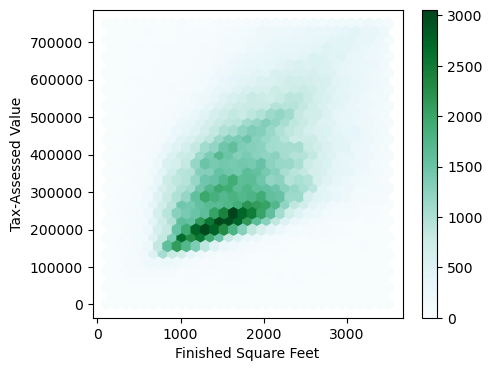

In [30]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue', gridsize=30, sharex=False, figsize=(5,4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

The seaborn kdeplot function in Python creates a contour plot: 

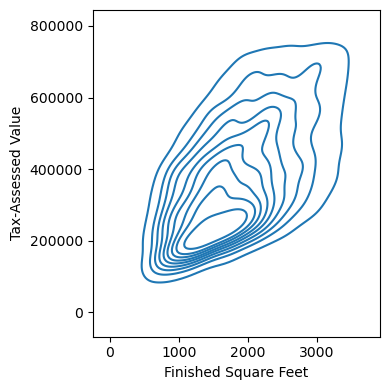

In [41]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

plt.tight_layout()
plt.show()

## Two Categorical Variables

A useful way to summarize two categorical variables is a contingency table—a table of counts by category.
Contingency tables can look only at counts, or they can also include columns and total percentages.

In [56]:
lc_loans = pd.read_csv(r"E:\Personal\Full_Stack_Data_Analyst\Data Science\O'Reilly Books\practical-statistics-for-data-scientists-master\practical-statistics-for-data-scientists-master\data\lc_loans.csv")
lc_loans

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B
...,...,...
450956,Current,D
450957,Current,D
450958,Current,D
450959,Current,D


The pivot_table method creates the pivot table in _Python_. The `aggfunc` argument allows us to _get the counts_. Calculating the percentages is a bit more involved:

In [64]:
#The margins keyword argument will add the column and row sums. 
crosstab = lc_loans.pivot_table(index='grade', columns='status',aggfunc=lambda x:len(x), margins=True)

crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [66]:
#We create a copy of the pivot table, ignoring the column sums.
df=crosstab.copy().loc['A':'G',:]

# We divide the rows with the row sum. 
df.loc[:,'Charged Off': 'Late']=df.loc[:,'Charged Off': 'Late'].div(df['All'],axis=0)
df['All']=df['All']/sum(df['All'])
perc_crosstab=df
perc_crosstab

C:\Users\User\AppData\Local\Temp\ipykernel_7528\684712536.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.0215478  0.04005439 0.04982834 0.06740983 0.08165728 0.1182579
 0.12619562]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:,'Charged Off': 'Late']=df.loc[:,'Charged Off': 'Late'].div(df['All'],axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_7528\684712536.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.69045386 0.70901262 0.73570217 0.71732838 0.70793587 0.65437074
 0.61400802]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:,'Charged Off': 'Late']=df.loc[:,'Charged Off': 'Late'].div(df['All'],axis=0)
C:\Users\User\AppData\Local\Temp\ipykernel_7528\684712536.py:5: FutureWarning: Setting an item of incompatible dtype is depre

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


## Categorical and Numeric Data

Boxplots (see “Percentiles and Boxplots” on page 20) are a simple way to visually compare the distributions of a numeric variable grouped according to a categorical variable.

In [70]:
airline_stats = pd.read_csv(r"E:\Personal\Full_Stack_Data_Analyst\Data Science\O'Reilly Books\practical-statistics-for-data-scientists-master\practical-statistics-for-data-scientists-master\data\airline_stats.csv")
airline_stats

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


Text(0.5, 0.98, '')

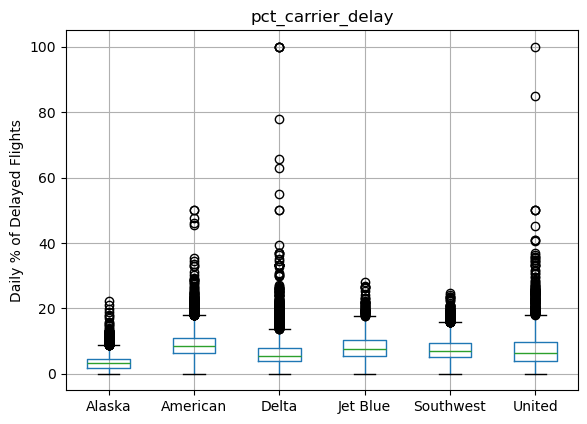

In [80]:
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

_Violin Plot_

Introduced by [Hintze-Nelson-1998], is an enhancement to the boxplot and plots the density estimate with the density on the y-axis. The density is mirrored and flipped over, and the resulting shape is filled in, creating an image resembling a violin. The advantage of a violin plot is that it can show nuances in the distribution that aren’t perceptible in a boxplot. On the other hand, the boxplot more clearly shows the outliers in the data.

Violin plots are available with the violinplot method of the _seaborn_ package: 

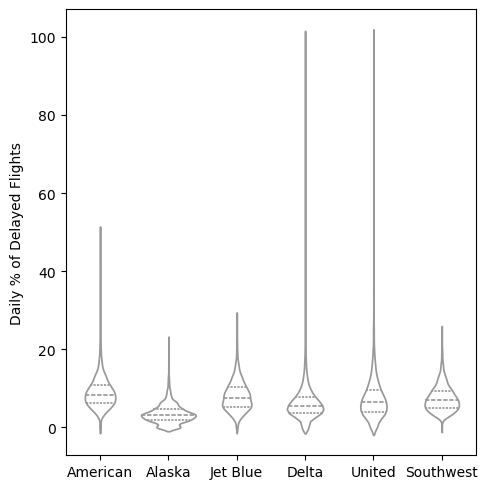

In [93]:
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay', ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

## Visualizing Multiple Variables

Most _Python_ packages base their visualizations on Matplotlib. While it is in principle possible to create faceted graphs using Matplotlib, the code can get complicated. Fortunately, seaborn has a relatively straightforward way of creating these graphs: 

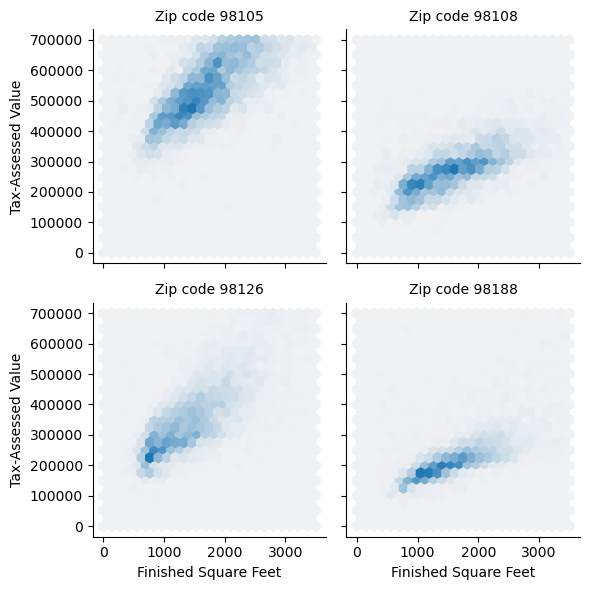

In [103]:
zip_codes = [98188,98105,98108,98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x,y, gridsize=25, cmap=cmap, **kwargs)

# Use the arguments col and row to specify the conditioning variables. For a single conditioning variable, use col together with col_wrap to wrap the faceted graphs into multiple rows.
g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)

# The map method calls the hexbin function with subsets of the original data set for the different zip codes. extent defines the limits of the x- and y-axes.
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax-Assessed Value')
g.set_titles('Zip code {col_name:.0f}')